In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('/home/fibonacci/Downloads/drug200.xls')

In [3]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
dataset.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [5]:
dataset.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
def cleaning(dataset):
    dataset['Drug']=dataset['Drug'].apply(lambda x: 0 if x=='DrugY' else 1 if x=='drugC' else 2 if x=='drugX' else 3 if x=='drugA' else 4 if x=='drugB'  else x)
    dataset['Sex']=dataset['Sex'].apply(lambda x:1 if x=='M' else 0 if x=='F' else x)
    dataset['BP']=dataset['BP'].apply(lambda x: 1 if x=='NORMAL' else 2 if x=='HIGH'else 0 if x=='LOW' else x)
    dataset['Cholesterol']=dataset['Cholesterol'].apply(lambda x:1 if x=='HIGH' else 0 if x=='NORMAL' else x)
    return dataset

In [7]:
dataset=cleaning(dataset)
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,0
1,47,1,0,1,13.093,1
2,47,1,0,1,10.114,1
3,28,0,1,1,7.798,2
4,61,0,0,1,18.043,0


In [8]:
y=dataset['Drug']
x=dataset.drop(columns=['Drug'],axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
str_x=StandardScaler()
x = str_x.fit_transform(x)

In [11]:
import tensorflow as tf
import keras
from tensorflow.keras import models,layers,Sequential

2024-03-12 11:51:54.373245: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 11:51:54.443610: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 11:51:54.443649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 11:51:54.445153: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 11:51:54.453473: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 11:51:56.725398: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=0)

In [13]:
model=tf.keras.models.Sequential([
    keras.layers.Dense(128,input_dim=x_train.shape[1],activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,batch_size=32,epochs=100,validation_split=0.3,verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 89ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2835 - val_accuracy: 0.8837
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2557 - val_accuracy: 0.9302
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3538 - val_accuracy: 0.9070
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.4287 - val_accuracy: 0.8837
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4396 - val_accuracy: 0.8837
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3986 - val_accuracy: 0.8837
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3659 - val_accuracy: 0.8837
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 14ms/step - loss: 1.5145e-04 - accuracy: 1.0000 - val_loss: 0.5295 - val_accuracy: 0.8837
Epoch 59/100
4/4 [==============================] - 0s 14ms/step - loss: 1.4026e-04 - accuracy: 1.0000 - val_loss: 0.5524 - val_accuracy: 0.8837
Epoch 60/100
4/4 [==============================] - 0s 15ms/step - loss: 1.3973e-04 - accuracy: 1.0000 - val_loss: 0.5694 - val_accuracy: 0.8837
Epoch 61/100
4/4 [==============================] - 0s 24ms/step - loss: 1.4420e-04 - accuracy: 1.0000 - val_loss: 0.5788 - val_accuracy: 0.8837
Epoch 62/100
4/4 [==============================] - 0s 15ms/step - loss: 1.4345e-04 - accuracy: 1.0000 - val_loss: 0.5780 - val_accuracy: 0.8837
Epoch 63/100
4/4 [==============================] - 0s 13ms/step - loss: 1.3893e-04 - accuracy: 1.0000 - val_loss: 0.5713 - val_accuracy: 0.8837
Epoch 64/100
4/4 [==============================] - 0s 13ms/step - loss: 1.3180e-04 - accuracy: 1.0000 - val_loss: 0.5686 - val_accuracy: 0.883

In [22]:
y_pred=model.predict(x_test).argmax(axis=1)

2/2 [==============================] - 0s 5ms/step


In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
conf=confusion_matrix(y_pred,y_test)

<AxesSubplot:>

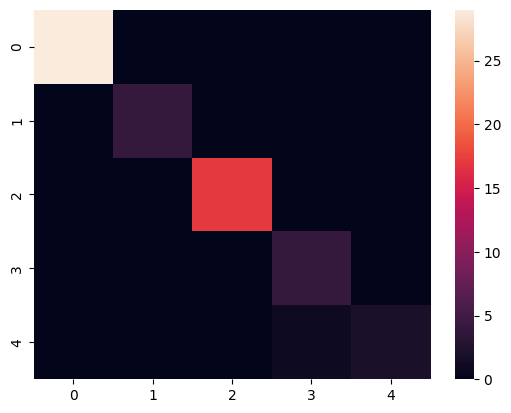

In [29]:
sns.heatmap(conf)

In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        17
           3       0.80      1.00      0.89         4
           4       1.00      0.67      0.80         3

    accuracy                           0.98        57
   macro avg       0.96      0.93      0.94        57
weighted avg       0.99      0.98      0.98        57

